In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import os

In [ ]:
import os.path
import keras
import pandas as pd
import numpy as np

In [ ]:
path = '/content/drive/My Drive/SDC/'

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile(f"{path}/07012018.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
#reading text file
text_data = pd.read_csv('/tmp/data.txt',header = None, sep = ",",names = ["image&angle", "Date&time"] )
text_data

,image&angle,Date&time
0,0.jpg 0.000000,2018-07-01 17:09:44:912
1,1.jpg 0.000000,2018-07-01 17:09:44:972
2,2.jpg 0.000000,2018-07-01 17:09:45:11
3,3.jpg 0.000000,2018-07-01 17:09:45:76
4,4.jpg 0.000000,2018-07-01 17:09:45:105
...,...,...
63820,63820.jpg -11.500000,2018-07-01 18:05:36:384
63821,63821.jpg -11.290000,2018-07-01 18:05:36:484
63822,63822.jpg -11.290000,2018-07-01 18:05:36:542
63823,63823.jpg -11.290000,2018-07-01 18:05:36:583


In [ ]:
new_text_data = text_data.drop("Date&time",axis = 1)
new_text_data

,image&angle
0,0.jpg 0.000000
1,1.jpg 0.000000
2,2.jpg 0.000000
3,3.jpg 0.000000
4,4.jpg 0.000000
...,...
63820,63820.jpg -11.500000
63821,63821.jpg -11.290000
63822,63822.jpg -11.290000
63823,63823.jpg -11.290000


In [ ]:
#Making dataframe having angle column
angles = new_text_data["image&angle"].str.split(" ")
data_rand = angles.to_list()
columns = ['image_name', 'angle']
angle = pd.DataFrame(data_rand, columns = columns)
angle
  

,image_name,angle
0,0.jpg,0.000000
1,1.jpg,0.000000
2,2.jpg,0.000000
3,3.jpg,0.000000
4,4.jpg,0.000000
...,...,...
63820,63820.jpg,-11.500000
63821,63821.jpg,-11.290000
63822,63822.jpg,-11.290000
63823,63823.jpg,-11.290000


In [ ]:
final_angle = angle.drop(axis=1,columns="image_name",index=None)
final_angle

,angle
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
63820,-11.500000
63821,-11.290000
63822,-11.290000
63823,-11.290000


In [ ]:
data = angle.values
data.shape

(63825, 2)

In [ ]:
print(data[0])

['0.jpg' '0.000000']


In [ ]:
x_data = data[:,0]
y_data = data[:,1]
print(x_data.shape,y_data.shape)

(63825,) (63825,)


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
os.listdir("/tmp/")

['drivefs_ipc.0_shell',
 'data',
 '__MACOSX',
 'tmpymvf3ql1',
 'drivefs_ipc.0',
 'data.txt']

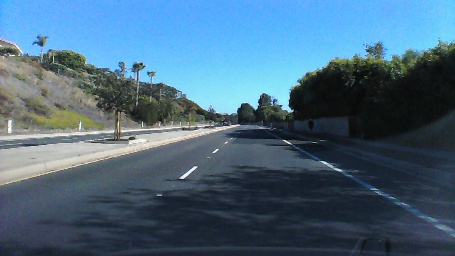

In [ ]:
src = '/tmp/data/0.jpg'
input_image = cv.imread(src)
scale_percent = 100 # Percent of the original image
width = int(input_image.shape[0] / 255)
height = int(input_image.shape[1] / 255)
dim = (width, height)

resized_img = cv.resize(input_image, dim, interpolation=cv.INTER_AREA)
cv2_imshow(input_image)
#plt.imshow("")

## Exploring our Dataset and pre-processing the images


In [ ]:
import matplotlib
import matplotlib.pyplot as plt

time: 1.23 ms


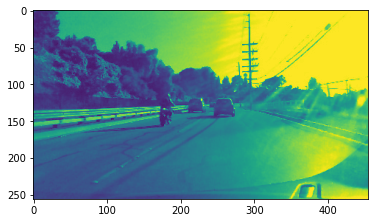

time: 197 ms


In [ ]:
#IMAGE WITH DIRECT SUNLIGHT GLARES ON IT
im = Image.open('/tmp/data/60222.jpg')
im = ImageOps.grayscale(im) 
matplotlib.pyplot.imshow(im)

<PIL.Image.Image image mode=RGB size=455x256 at 0x7FE3B98C8AC8> OUT
[array([[[0.49411765, 0.54509807, 0.6509804 ],
        [0.5176471 , 0.5686275 , 0.6627451 ],
        [0.45882353, 0.50980395, 0.5882353 ],
        ...,
        [0.78431374, 0.78431374, 0.78431374],
        [0.78431374, 0.78431374, 0.78431374],
        [0.78431374, 0.78431374, 0.78431374]],

       [[0.3882353 , 0.42352942, 0.5137255 ],
        [0.45490196, 0.49019608, 0.57254905],
        [0.46666667, 0.49803922, 0.5686275 ],
        ...,
        [0.78431374, 0.78431374, 0.78431374],
        [0.78431374, 0.78431374, 0.78431374],
        [0.78431374, 0.78431374, 0.78431374]],

       [[0.35686275, 0.3764706 , 0.43529412],
        [0.3529412 , 0.37254903, 0.42745098],
        [0.36862746, 0.38039216, 0.43137255],
        ...,
        [0.78431374, 0.78431374, 0.78431374],
        [0.78431374, 0.78431374, 0.78431374],
        [0.78431374, 0.78431374, 0.78431374]],

       ...,

       [[0.44313726, 0.3882353 , 0.40784314],

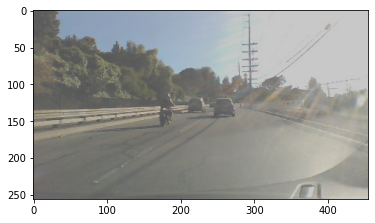

time: 222 ms


In [ ]:
from PIL import Image, ImageEnhance, ImageOps
for o in range(60222, 60223):
  img = image.load_img(f'/tmp/data/{o}.jpg',color_mode='grayscale',target_size=[100,100])
  for k in range(len(rgb_pixel_value)):
      if rgb_pixel_value[k] > 200:
        enhancer = ImageEnhance.Contrast(img)
        factor = 0.5 
        im_output = enhancer.enhance(factor)

  print(im_output, "OUT")

  plt.imshow(im_output)
  img = image.img_to_array(im_output)/255.0
  xd = []
  xd.append(img)
print(xd, "XD")

## Splitting our Dataset into train and validation set

In [ ]:
l = (int)(x_data.shape[0]*0.8)
xtrain = x_data[:l]
ytrain = y_data[:l]
xtest = x_data[l:]
ytest = y_data[l:]
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape) 

(51060,) (12765,) (51060,) (12765,)


In [ ]:
xtrain.dtype

dtype('O')

### Shuffle the test and validation set separetaly

In [ ]:
import random
c = list(zip(xtrain,ytrain))
random.shuffle(c)
xtrain,ytrain = zip(*c)


c = list(zip(xtest,ytest))
random.shuffle(c)
xtest,ytest = zip(*c)

In [ ]:
#ROOT = '/SDC/My Drive/SDC/selfdrivingcat/'
os.listdir(ROOT)

['07012018.zip', 'data', 'Weights', 'nw', 'Recording.mp4']

In [ ]:
Trainer = 0
Tester = 0
data_path = f'/tmp/data/'
#folder_path = fpt

In [ ]:
from keras.preprocessing import image
from tqdm import tqdm

In [ ]:
pip install ipython-autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=4549cf670df24e9ed326c8a591a5cfd2df61df562f7424ccea755f566a773a8a
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
%load_ext autotime

In [ ]:
import tensorflow as tf

time: 647 µs


In [ ]:
data.dtype

dtype('O')

time: 3.3 ms


In [ ]:
from keras.layers import Conv2D,Flatten, Dense, Dropout, MaxPooling2D
from keras.models import Sequential
import tensorflow as tf
from keras import regularizers
from keras.optimizers import Adam

time: 1.74 ms


# MODEL

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(100, 100, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                 
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                 
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                 
                                    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                 
                                    tf.keras.layers.Conv2D(512,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                 
                                    tf.keras.layers.Dense(256, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                 
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                 
                                    tf.keras.layers.Dense(1, activation='tanh')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 98, 98, 16)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 256)        

# MODEL 2

In [ ]:
cnn = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(100, 100, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(512,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(256, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(1, activation='tanh')
])

cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 256)        

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(lr = 0.0001), loss = 'mse', metrics = ['mae'])

time: 16.3 ms


In [ ]:
import keras
filepath_02="/content/drive/My Drive/SDC/nw/z-1-weights-{val_loss:.4f}.h5"
checkpointing = keras.callbacks.ModelCheckpoint(filepath_02, monitor='val_loss', verbose=1, save_best_only = True, save_weights_only=True, mode='auto', period=1)
callbacks_l = [checkpointing]

time: 6.4 ms


In [ ]:
cnn.compile(optimizer = Adam(lr = 0.0001), loss = 'mse', metrics = ['mae'])

time: 12.6 ms


## Function tom Load Images in given batch sizes

In [ ]:
def LoadBatch(xdata, ydata, batch_size):
  xd = []
  yd = []
  Pointer = 0;
  l = len(xtrain)
  while True:
    img = image.load_img(data_path+xdata[(Pointer) % l], color_mode = 'grayscale', target_size = [100, 100])
    enhancer = ImageEnhance.Contrast(img)
    img = ImageOps.grayscale(img)
    factor = 0.5 #increase contrast
    im_output = enhancer.enhance(factor)
    img = image.img_to_array(img) / 255.0
    xd.append(img)
    yd.append(float(ydata[(Pointer) % l]) * (np.pi / 180))
    Pointer = Pointer + 1
    if len(xd) == batch_size:
      yield np.array(xd), np.array(yd)
      xd = []
      yd = []

time: 8.73 ms


## Training 

In [ ]:
batch_size = 100
train_data_generator = LoadBatch(xtrain, ytrain, batch_size)
valid_data_generator = LoadBatch(xtest, ytest, batch_size)

time: 1.24 ms


In [3]:
model.fit(train_data_generator, epochs = 5, steps_per_epoch = len(xtrain) // batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

NameError: name 'model' is not defined